<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/ESAA_WEEK13_1%EA%B5%B0%EC%A7%91%ED%99%942.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#03 평균이동

평균이동은 K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화 수행

K-평균과 차이: 중심을 데이터가 모여있는 밀도가 가장 높은 곳으로 이동시킴

데이터의 분포도를 이용해 군집 중심점 찾음  확률밀도 함수 이용  
확률밀도함수 찾기 위해 KDE 이용

주변 데이터와의 거리값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트 하면서 이동하는 방식

이러한 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾아냄

* KDE: 커널의 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법

관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수 추정
> 확률밀도함수: 정규분포/감마분포/t분포

확률 밀도 함수를 알게 되면 특정 변수가 어떤 값을 갖게 될지에 대한 확률을 알게 되므로 이를 통해 변수의 특성, 확률 분포 등 변수의 많은 요소를 알 수 있음

> 대표적인 커널함수: 가우시안 분포 함수

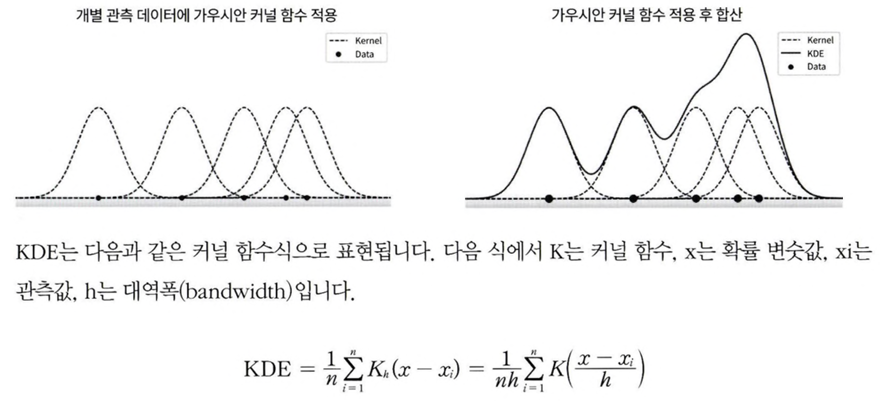



h: KDE 형태를 부드러운 형태로 평활화 하는 데 적용되며 h를 어떻게 설정하냐에 따라 확률 밀도 추정 성능을 크게 좌우
> h가 작을수록 좁고 뾰족한 KDE=과적합 하기 쉬움/h가 너무 크면(10 정도) 과소적합하기 쉬움

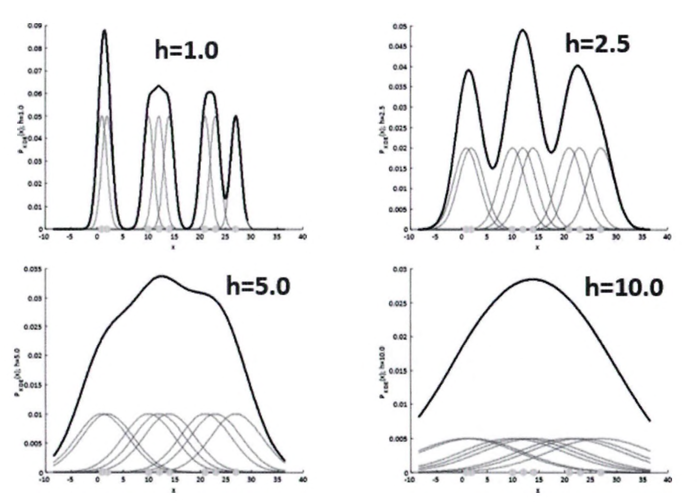

대역폭이 클수록 평활화되어 적은 수의 군집 중심점을 가지며 대역폭이 작을수록 많은 수의 군집 중심점

군집의 개수를 지정하지 않으며 오직 대역폭의 크기에 따라 군집화 수행

MeanShift 클래스 제공
h=bandwidth 파라미터

최적 대역폭 계산을 위해 estimate_bandwidth()함수 제공

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.7,random_state=0)

meanshift=MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


6개로 분류/지나치게 세분화

In [2]:
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [3]:
#최적화
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(X)
print('bandwidth 값:',round(bandwidth,3))

bandwidth 값: 1.816


In [4]:
#적용
import pandas as pd
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

best_bandwidth=estimate_bandwidth(X)
meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(X)

print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


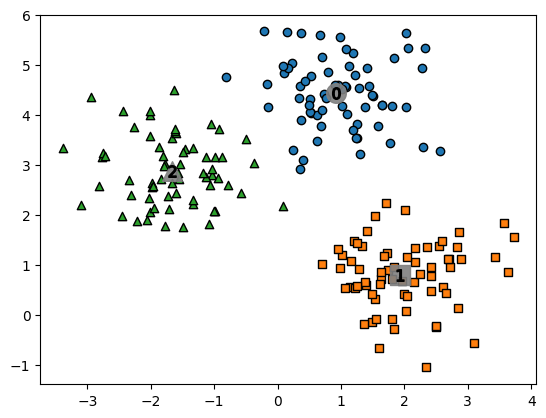

In [8]:
#시각화
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']=cluster_labels
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','*','+']

for label in unique_labels:
    label_cluster=clusterDF[clusterDF['meanshift_label']==label]
    center_x_y=centers[label]
    plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],
                edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='gray',alpha=0.9,
                marker=markers[label])
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',
                edgecolor='k',marker='$%d$'%label)
plt.show()

In [9]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


평균이동 장점: 데이터 세트의 형태를 특정 형태로 가정하거나 특정 분포도 기반의 모델로 가정하지 않기 때문에 더 유연한 군집화 가능

이상치의 영향력도 크지 않으며 군집의 개수 정할 필요 없음

그러나 수행 시간 오래걸리고 h에 의한 군집화 영향 큼

이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적
하는 데 뛰어난 역할을 수행하는 알고리즘

#04 GMM(Gaussian Mixture Model)

군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화 수행

* 가우시안 분포: 정규분포/좌우 대칭형의 종 형태를 가진 통계학에서 가장 잘 알려진 연속 확률 함수

* 정규 분포는 평균 뮤를 중심으로 높은 데이터 분포도/ 좌우 표준편차 1에 전체 데이터의 68.27% 좌우 표준편차 2에 전체 데이터의 95.45% 가지고 있음
* 평균이 0이고 표준편차가 1인 정규분포를 표준 정규 분포

* GMM는 데이터를 여러개의 가우시안 분포가 섞인 것으로 간주/서로 다른 정규분포 형태를 가진 여러가지 확률 분포 곡선으로 구성 가능
> 여러개의 정규 분포 곡선을 추출하고 개별 데이터가 이중 어떤 정규 분포에 속하는지 결정하는 방식

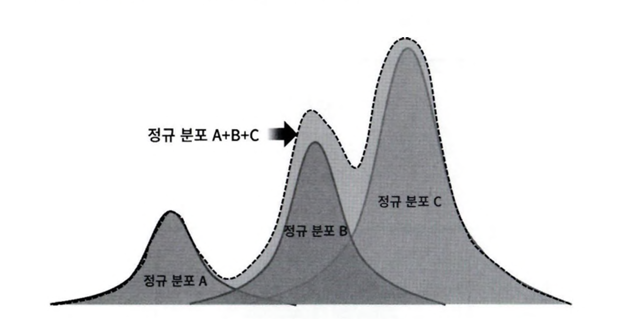

모수추정: 개별 정규 분포의 평균과 분산/각 데이터가 어떤 정규 분포에 해당하는지의 확률
> 모수추정에 EM(Expectation and Maximization)방법 사용


##GMM을 이용한 붓꽃 데이터 세트 군집화

GMM:확률 기반 군집화  
K-평균: 거리 기반 군집화


In [10]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(data=iris.data,columns=feature_names)
irisDF['target']=iris.target

가장 중요한 초기화 파라미터: n_components(모델의 총 개수)

In [11]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3,random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)

irisDF['gmm_cluster']=gmm_cluster_labels

iris_result=irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


k평균보다 잘됨

In [12]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels=kmeans.predict(iris.data)
irisDF['kmeans_cluster']=kmeans_cluster_labels
iris_result=irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


데이터에 따라 효과적인 군집화가 있음
k-평균은 평균 거리 중심으로 중심을 이동하면서 군집화를 수행하므로 개별 군집 내의 데이터가 원형으로 흩어진 경우 효과적

##GMM & K-평균 비교

kmeans는 원형의 범위에서 군집화 수행  원형일수록 효율 높음

cluster_std를 0.5로 작게 설정해 군집 내 데이터를 뭉치게 유도한 데이터 세트에 적용하면 효과적으로 군집화됨

길쭉한 타원형인 경우 잘 못함

별도 함수 만들어 시각화

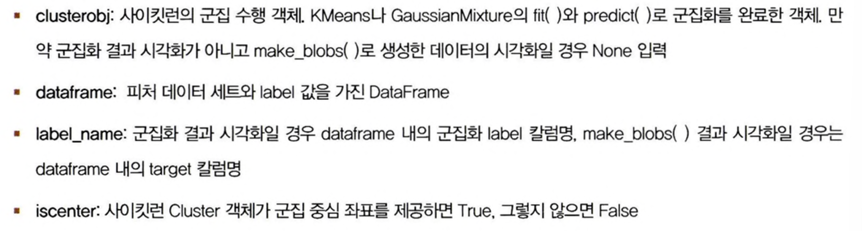

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# %matplotlib inline  # (주피터에서만 필요)

def visualize_cluster_plot(cluster_result=None, dataframe=None, label_name='target', iscenter=True):
    if dataframe is None:
        print("Error: DataFrame is required.")
        return

    unique_labels = np.unique(dataframe[label_name])

    markers = ['o', 's', '^', 'x', '*', 'D', '+', 'v', '<', '>']

    plt.figure(figsize=(8, 6))

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name] == label]

        plt.scatter(
            x=label_cluster['ftr1'],
            y=label_cluster['ftr2'],
            edgecolor='k',
            s=60,
            marker=markers[int(label) % len(markers)],
            label=f"Cluster {label}"
        )

        # 군집 중심 표시
        if iscenter and cluster_result is not None and hasattr(cluster_result, 'cluster_centers_'):
            center_x_y = cluster_result.cluster_centers_[int(label)]

            plt.scatter(
                x=center_x_y[0], y=center_x_y[1],
                s=200,
                color='gray',
                alpha=0.9,
                marker=markers[int(label) % len(markers)]
            )
            plt.scatter(
                x=center_x_y[0], y=center_x_y[1],
                s=70,
                color='k',
                marker=f'${label}$'
            )

    plt.title("Cluster Visualization")
    plt.xlabel("ftr1")
    plt.ylabel("ftr2")
    plt.legend()
    plt.grid(True)
    plt.show()


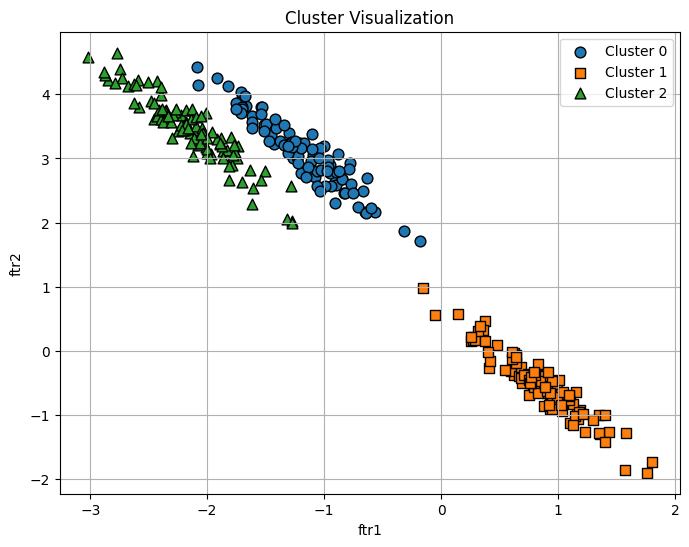

In [15]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=300,n_features=2,centers=3,cluster_std=0.5,random_state=0)

transformation=[[0.60834549, -0.63667341],[-0.40887718, 0.85253229]]
X_aniso=np.dot(X,transformation)

clusterDF=pd.DataFrame(data=X_aniso,columns=['ftr1','ftr2'])
clusterDF['target']=y
visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

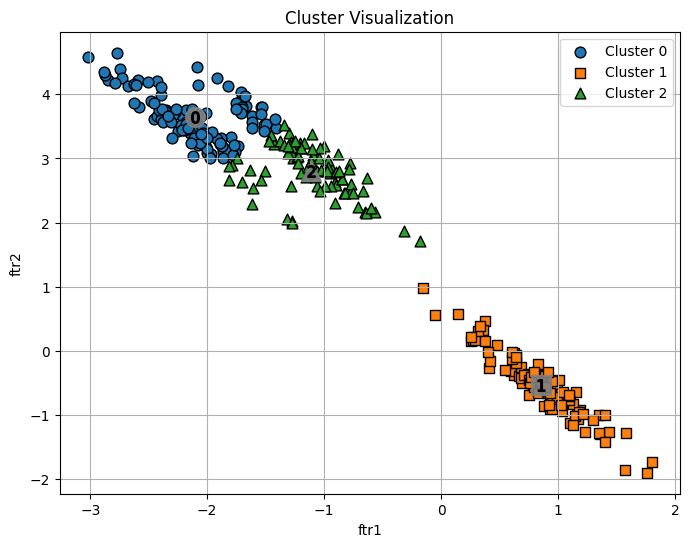

In [16]:
#KMeans
kmeans=KMeans(3,random_state=0)
kmeans_label=kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']=kmeans_label

visualize_cluster_plot(kmeans,clusterDF,'kmeans_label',iscenter=True)

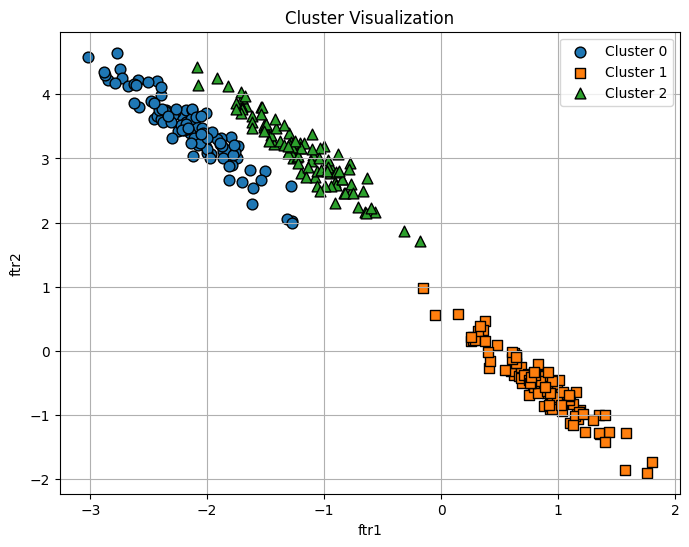

In [17]:
#GMM
gmm=GaussianMixture(n_components=3,random_state=0)
gmm_label=gmm.fit_predict(X_aniso)
clusterDF['gmm_label']=gmm_label

visualize_cluster_plot(gmm,clusterDF,'gmm_label',iscenter=False)

k-평균과 다르게 군집 중심 좌표를 구할 수 없어 표현안됨

각각 얼만큼의 군집화 효율 차이 발생하는지 확인

In [18]:
print('###KMeans Clustering###')
print(clusterDF.groupby(['target'])['kmeans_label'].value_counts())
print('###Gaussian Mixture Clustering###')
print(clusterDF.groupby(['target'])['gmm_label'].value_counts())

###KMeans Clustering###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64
###Gaussian Mixture Clustering###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64


GMM은 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점

오래걸린다는 단점